# Tutorial 6

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import numpy as np
from scipy import stats, optimize
from math import exp, log, sqrt

Q2:

Approximate the following

\begin{align*}
    \operatorname*{argmax}_{\theta\in\mathbb{R}}\ell(\theta)
        =\operatorname*{argmax}_{\theta\in\mathbb{R}} 5\theta-8\theta^{2}
                -5\log[1+\exp (\theta)]
\end{align*}

In [2]:
def log_pos(th):
    return 5*th - 8*th*th - 5*log(1+exp(th))

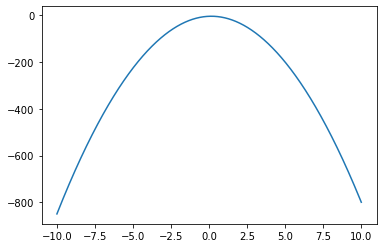

In [3]:
theta = np.linspace(-10, 10, 10000)
plt.plot(theta, [log_pos(th) for th in theta])
plt.show()

Posterior mode is at: $\hat\theta = 0.1449458887975625$.

In [4]:
minima = optimize.minimize_scalar(lambda x: -log_pos(x))

In [5]:
minima

     fun: 3.2845650069279952
    nfev: 12
     nit: 8
 success: True
       x: 0.1449458887975625

In [6]:
def hessian(th):
    return -16 - 5*exp(th)/( (1+exp(th))**2 )

$P(\theta > 0|y=5) \approx 0.726$

In [7]:
1 - stats.norm.cdf(0, minima.x, 1/sqrt(-(hessian(minima.x))))

0.7263767573766504

Q3: 

\begin{align}
    \text{posterior: } p(\theta_1,\theta_2)
        &=\frac{1}{e^{s\theta_1}}\exp\left\{-\frac{t-n(t_1-e^{\theta_2})}{e^{\theta_1}}\right\}\cdot e^{\theta_1+\theta_2}\\
    \text{log posterior: } \ell(\theta_1,\theta_2)
        &:=\log[p(\theta_1,\theta_2)]
        =(1-s)\theta_1+\theta_2-(t-nt_1)e^{-\theta_1}-ne^{\theta_2-\theta_1}
\end{align}

In [8]:
s = 8
n = 15
t = 15962989
t1 = 237217

In [9]:
def log_pos_q3(th):
    return (1-s)*th[0] + th[1] - (t-n*t1)*exp(-th[0]) - n*exp(th[1]-th[0])

In [10]:
minima = optimize.minimize(lambda x: -log_pos_q3(x), x0=np.array([10,1]))

From the numerical optimizer, we obtain the following:

$\displaystyle\operatorname*{argmax}_{\theta_1,\theta_2}\log[p(\theta_1,\theta_2)] \approx (14.54182918, 11.83377733)$

Note that $-\left[\ell''(\hat{\theta}_1, \hat{\theta}_2)\right]^{-1}$ is given as `hess_inv` below

\begin{align*}
    -\left[\ell''(\hat{\theta}_1, \hat{\theta}_2)\right]^{-1}
        \approx
        \begin{bmatrix}
            0.16657589 & 0.16677481\\
            0.16677481 & 1.12101448
        \end{bmatrix}
\end{align*}

In [11]:
minima

      fun: 96.95902577720479
 hess_inv: array([[0.16657589, 0.16677481],
       [0.16677481, 1.12101448]])
      jac: array([ 9.53674316e-07, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 56
      nit: 13
     njev: 14
   status: 0
  success: True
        x: array([14.54182918, 11.83377733])

In [12]:
x = np.arange(14,15,0.1)
y = np.arange(10,12,0.1)
X,Y = np.meshgrid(x,y)
Z = []

for i in range(X.shape[0]):
    temp = [-log_pos_q3([X[i,j], Y[i,j]]) for j in range(X.shape[1])]
    Z.append(temp)
    
Z = np.array(Z)

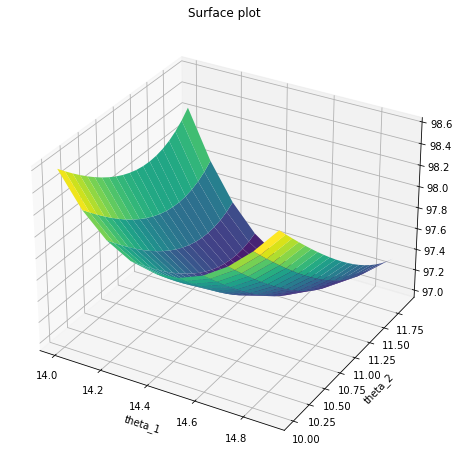

In [13]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel("theta_1")
ax.set_ylabel("theta_2")
ax.set_title('Surface plot')
plt.show()